# 学習記録

In [ ]:
最小二乗法は誤差関数の傾きを最小にする方法
aについて偏微分、bについて偏微分したものの連立方程式をとれば解が出る
二乗を取るのは値を正にする為

In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

# 演習

In [3]:
df = pd.read_csv("Week6Exercise1.csv", header=None)

In [4]:
df

,0,1
0,-0.060229,0.610029
1,2.127239,1.730922
2,-0.759270,0.277689
3,2.191272,1.839378
4,-0.313909,0.972724
5,-3.442067,-0.490282
6,0.442556,2.461964
7,-3.384634,-1.052276
8,0.385539,1.063143
9,-4.360722,-1.272926


In [5]:
df.head()
x =np.array(df.loc[:, [0]])
y = np.array(df.loc[:,[1]])

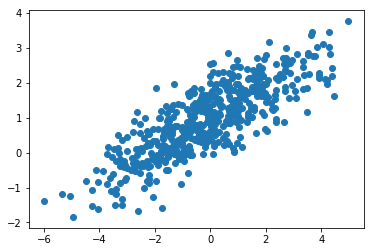

In [131]:
plt.scatter(x, y)

In [132]:
print(x.mean())
print(np.std(x))
print(y.mean())
print(np.std(y))

-0.12187808410605419
1.9749213418471876
0.9499441282173267
1.0304480101175666


In [133]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr = LinearRegression()

In [134]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
xdev = x-x.mean()
ydev = y-y.mean()
xvar  = np.var(x)
yvar = np.var(y)
xstd = np.std(x)
ystd = np.std(y)

In [140]:
xystd = ystd / xstd
xystd

0.5217666082608464

In [150]:
a = lr.intercept_ #a

In [151]:
b = lr.coef_ #b

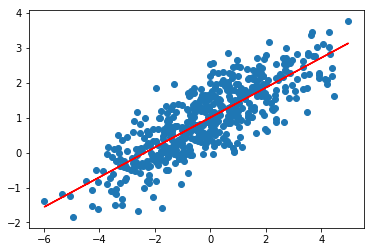

In [96]:
# 散布図に近似直線を重ねてみる
plt.scatter(xvec, yvec)                       # 散布図を表示
plt.plot(xvec, lr.predict(xvec), color='red') # 回帰直線を表示
plt.show()                              # 上記の内容でグラフを表示

In [148]:
def sqrdiff(xvec, yvec, a,b):
    rss = np.square(yvec - (a + b * xvec)).sum()
    return rss

In [152]:
sqrdiff(xvec, yvec, a, b)

175.0943749100058

In [153]:
def find_min(xvec, yvec,a=1)
     rss = np.square(yvec - (a + b * xvec)).sum()

(0.5000000000000002, -0.25)


In [ ]:
def find_min(a,b):
    if(a>b):
        a,b = b,a
    step = 0.01
    x = a
    min = x*(x-1)
    argmin = x
    while(x < b):
        v = x*(x-1)
        if (v < min):
            min = v
            argmin = x
        x += step
    return argmin,min

print(find_min(-1.0,1.0))